In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv('house-votes-84.csv')

# Preprocessing
# Convert votes to numerical values (y=1, n=0, ?=2)
votes = data.iloc[:, 1:].replace({'y': 1, 'n': 0, '?': 2})

# Encode party labels (democrat=0, republican=1)
le = LabelEncoder()
party = le.fit_transform(data['Class Name'])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    votes, party, test_size=0.3, random_state=42)

# Initialize and train k-NN classifier
# Starting with k=5 as a common default value
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

<ipython-input-2-b0c143872a18>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  votes = data.iloc[:, 1:].replace({'y': 1, 'n': 0, '?': 2})


Accuracy: 0.916030534351145

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        85
           1       0.86      0.91      0.88        46

    accuracy                           0.92       131
   macro avg       0.90      0.92      0.91       131
weighted avg       0.92      0.92      0.92       131



Matplotlib is building the font cache; this may take a moment.
<ipython-input-3-6430dfca083f>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  votes = data.iloc[:, 1:].replace({'y': 1, 'n': 0, '?': 2})


Accuracy: 0.9847328244274809

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        85
           1       0.98      0.98      0.98        46

    accuracy                           0.98       131
   macro avg       0.98      0.98      0.98       131
weighted avg       0.98      0.98      0.98       131



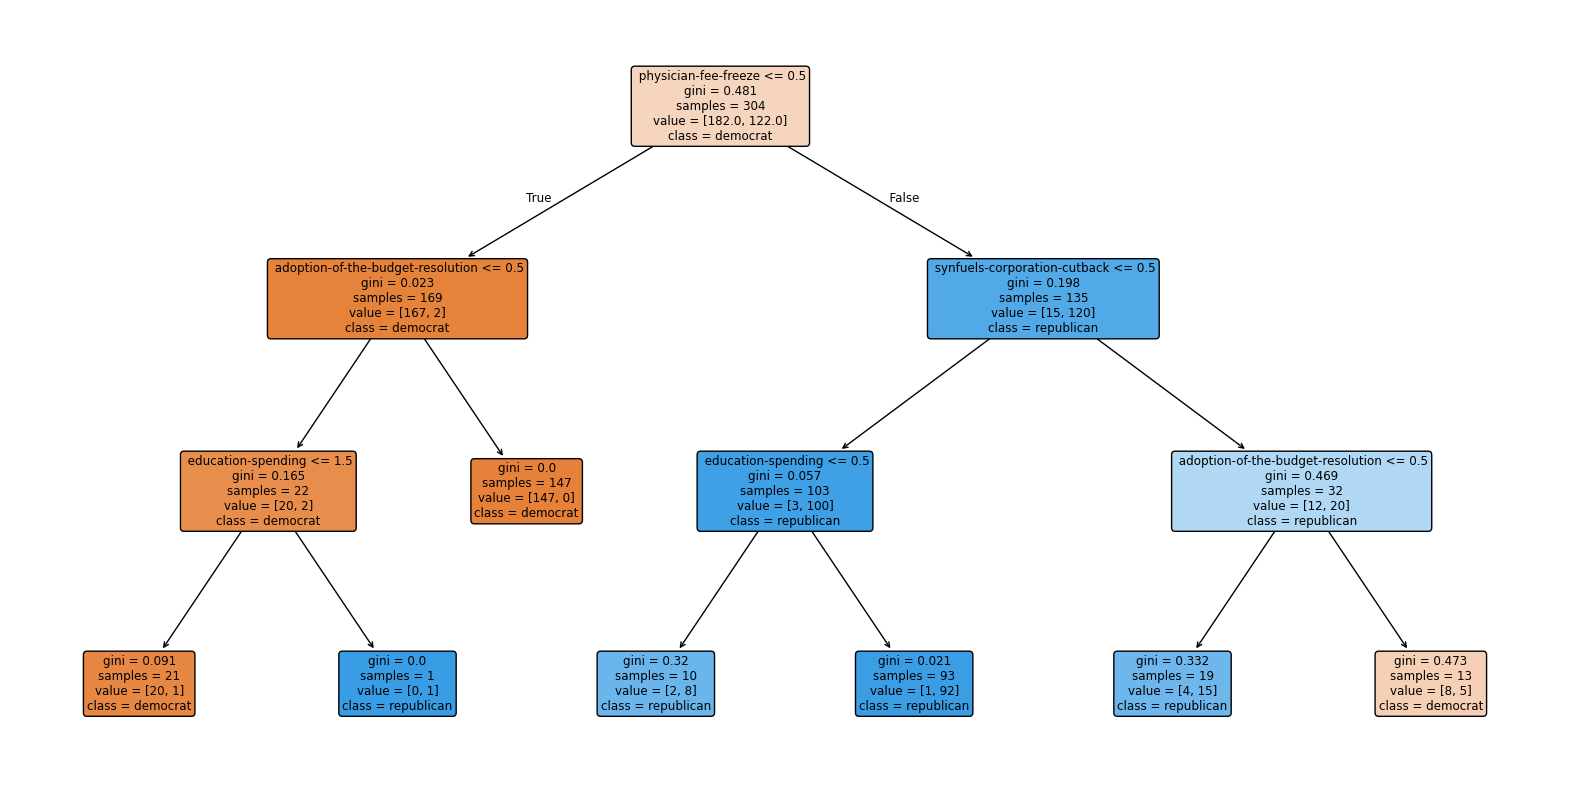

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('house-votes-84.csv')

# Preprocessing
# Convert votes to numerical values (y=1, n=0, ?=2)
votes = data.iloc[:, 1:].replace({'y': 1, 'n': 0, '?': 2})

# Encode party labels (democrat=0, republican=1)
le = LabelEncoder()
party = le.fit_transform(data['Class Name'])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    votes, party, test_size=0.3, random_state=42)

# Initialize Decision Tree classifier
# Using max_depth=3 for interpretability (can adjust)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt, 
          feature_names=votes.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True)
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('house-votes-84.csv')

# Preprocessing
# Convert votes to numerical values (y=1, n=0, ?=np.nan)
votes = data.iloc[:, 1:].replace({'y': 1, 'n': 0, '?': np.nan})

# Impute missing values with most frequent value
imputer = SimpleImputer(strategy='most_frequent')
votes_imputed = imputer.fit_transform(votes)

# One-hot encode the votes (since they're categorical)
# This creates 3 features per vote: y, n, and missing (if present)
encoder = OneHotEncoder(drop='first', sparse=False)  # drop first to avoid dummy trap
votes_encoded = encoder.fit_transform(votes_imputed)

# Encode party labels (democrat=0, republican=1)
le = LabelEncoder()
party = le.fit_transform(data['Class Name'])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    votes_encoded, party, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(32, 16),  # Two hidden layers
                    activation='relu',
                    solver='adam',
                    max_iter=500,
                    random_state=42,
                    early_stopping=True,
                    validation_fraction=0.1)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot training curve
plt.plot(mlp.loss_curve_, label='Training Loss')
if hasattr(mlp, 'validation_scores_'):
    plt.plot(mlp.validation_scores_, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

<ipython-input-4-05661493c272>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  votes = data.iloc[:, 1:].replace({'y': 1, 'n': 0, '?': np.nan})


<class 'TypeError'>: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

<ipython-input-5-15a6ed7c51a7>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  votes = data.iloc[:, 1:].replace({'y': 1, 'n': 0, '?': np.nan})


Accuracy: 0.9542

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        85
           1       0.93      0.93      0.93        46

    accuracy                           0.95       131
   macro avg       0.95      0.95      0.95       131
weighted avg       0.95      0.95      0.95       131



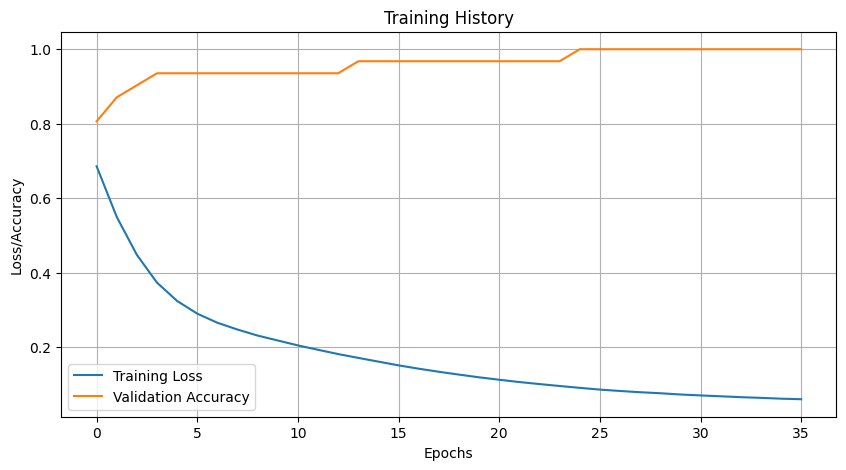


Feature Importance (approximate):
 handicapped-infants: 0.1637
 water-project-cost-sharing: 0.1899
 adoption-of-the-budget-resolution: 0.2115
 physician-fee-freeze: 0.2300
 el-salvador-aid: 0.1887
 religious-groups-in-schools: 0.1697
 anti-satellite-test-ban: 0.1842
 aid-to-nicaraguan-contras: 0.2018
 mx-missile: 0.1724
 immigration: 0.1879
 synfuels-corporation-cutback: 0.1579
 education-spending: 0.2106
 superfund-right-to-sue: 0.1759
 crime: 0.2138
 duty-free-exports: 0.2079
 export-administration-act-south-africa: 0.1773


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('house-votes-84.csv')

# Data Preprocessing
# Convert votes to numerical (y=1, n=0, ?=np.nan)
votes = data.iloc[:, 1:].replace({'y': 1, 'n': 0, '?': np.nan})

# 1. Handle missing values - impute with most frequent value
imputer = SimpleImputer(strategy='most_frequent')
votes_imputed = imputer.fit_transform(votes)

# 2. Encode target variable
le = LabelEncoder()
party = le.fit_transform(data['Class Name'])  # democrat=0, republican=1

# 3. Split data before scaling to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    votes_imputed, party, test_size=0.3, random_state=42)

# 4. Scale features - critical for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Model Implementation
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),  # Two hidden layers
    activation='relu',            # Good default choice
    solver='adam',                # Good for this dataset size
    alpha=0.001,                  # L2 regularization
    batch_size=32,                # Small batches for small dataset
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    early_stopping=True,          # Prevents overfitting
    validation_fraction=0.1,      # 10% of training for validation
    n_iter_no_change=10           # Stop if no improvement
)

# Train the model
history = mlp.fit(X_train_scaled, y_train)

# Evaluation
y_pred = mlp.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.loss_curve_, label='Training Loss')
if hasattr(history, 'validation_scores_'):
    plt.plot(history.validation_scores_, label='Validation Accuracy')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.grid()
plt.show()

# Feature importance (approximation)
print("\nFeature Importance (approximate):")
importance = np.abs(mlp.coefs_[0]).mean(axis=1)
for i, col in enumerate(data.columns[1:]):
    print(f"{col}: {importance[i]:.4f}")